In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import scale
from tensorflow.keras import backend as K, callbacks
from sklearn.metrics import accuracy_score as accuracy, f1_score, mean_absolute_error as mae
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.utils.vis_utils import plot_model


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cnnpred-stock-market-prediction/Processed_NASDAQ.csv
/kaggle/input/cnnpred-stock-market-prediction/Processed_NYSE.csv
/kaggle/input/cnnpred-stock-market-prediction/Processed_SP.csv
/kaggle/input/cnnpred-stock-market-prediction/Processed_DJI.csv
/kaggle/input/cnnpred-stock-market-prediction/Processed_RUSSELL.csv


In [2]:
dataset_NASDAQ = pd.read_csv("/kaggle/input/cnnpred-stock-market-prediction/Processed_NASDAQ.csv", parse_dates=['Date'])
dataset_NYSE = pd.read_csv("/kaggle/input/cnnpred-stock-market-prediction/Processed_NYSE.csv", parse_dates=['Date'])
dataset_SP = pd.read_csv("/kaggle/input/cnnpred-stock-market-prediction/Processed_SP.csv", parse_dates=['Date'])
dataset_DJI = pd.read_csv("/kaggle/input/cnnpred-stock-market-prediction/Processed_DJI.csv", parse_dates=['Date'])
dataset_RUSSELL = pd.read_csv("/kaggle/input/cnnpred-stock-market-prediction/Processed_RUSSELL.csv", parse_dates=['Date'])

In [3]:
dataset_NASDAQ.head(5)

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [4]:
dataset_NASDAQ['Date']

0      2009-12-31
1      2010-01-04
2      2010-01-05
3      2010-01-06
4      2010-01-07
          ...    
1979   2017-11-09
1980   2017-11-10
1981   2017-11-13
1982   2017-11-14
1983   2017-11-15
Name: Date, Length: 1984, dtype: datetime64[ns]

In [5]:
dataset_NASDAQ.index = dataset_NASDAQ['Date']
dataset_NYSE.index = dataset_NYSE['Date']
dataset_SP.index = dataset_SP['Date']
dataset_DJI.index = dataset_DJI['Date']
dataset_RUSSELL.index = dataset_RUSSELL['Date']

In [6]:
dataset_NASDAQ.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2017-11-02', '2017-11-03', '2017-11-06', '2017-11-07',
               '2017-11-08', '2017-11-09', '2017-11-10', '2017-11-13',
               '2017-11-14', '2017-11-15'],
              dtype='datetime64[ns]', name='Date', length=1984, freq=None)

In [7]:
dataset_NASDAQ['Date']

Date
2009-12-31   2009-12-31
2010-01-04   2010-01-04
2010-01-05   2010-01-05
2010-01-06   2010-01-06
2010-01-07   2010-01-07
                ...    
2017-11-09   2017-11-09
2017-11-10   2017-11-10
2017-11-13   2017-11-13
2017-11-14   2017-11-14
2017-11-15   2017-11-15
Name: Date, Length: 1984, dtype: datetime64[ns]

In [8]:
dataset_NASDAQ.columns

Index(['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200',
       'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA',
       'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM',
       'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'GSPC', 'HSI', 'DJI',
       'SSEC', 'RUT', 'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2',
       'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent',
       'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F',
       'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD',
       'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F',
       'Dollar index', 'wheat-F', 'XAG', 'XAU'],
      dtype='object')

In [9]:
# del dataset_NASDAQ['Name'] # Deletes "Name" column

In [10]:
dataset_NASDAQ.columns

Index(['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200',
       'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA',
       'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM',
       'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'GSPC', 'HSI', 'DJI',
       'SSEC', 'RUT', 'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2',
       'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent',
       'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F',
       'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD',
       'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F',
       'Dollar index', 'wheat-F', 'XAG', 'XAU'],
      dtype='object')

In [11]:
dataset_NASDAQ

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-09,2017-11-09,6750.049805,0.058830,-0.005755,0.003153,-0.002750,0.003252,0.522862,2.947790,2.194980,...,-0.24,-0.62,-0.34,-0.27,-0.61,-0.44,-0.45,0.53,-0.26,0.32
2017-11-10,2017-11-10,6750.939941,-0.116863,0.000132,-0.005755,0.003153,-0.002750,-0.199573,0.741356,1.838727,...,-0.27,-0.58,-0.20,-0.17,0.18,-0.07,-0.05,0.70,-0.71,-0.80
2017-11-13,2017-11-13,6757.600098,-0.000091,0.000987,0.000132,-0.005755,0.003153,-0.424963,0.875362,2.592598,...,-0.38,0.72,-0.04,0.10,0.06,0.12,0.11,-1.85,0.83,0.16


In [12]:
print(dataset_NASDAQ.shape)
print(dataset_NYSE.shape)
print(dataset_SP.shape)
print(dataset_DJI.shape)
print(dataset_RUSSELL.shape)

(1984, 84)
(1984, 84)
(1984, 84)
(1984, 84)
(1984, 84)


## Data Preparation

In [13]:
whole_data = dataset_NASDAQ.append(dataset_NYSE, ignore_index=True)

In [14]:
whole_data

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,IXIC,S&P
0,2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,NaN,NaN
1,2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,NaN,NaN
2,2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,...,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12,NaN,NaN
3,2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,...,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77,NaN,NaN
4,2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,...,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,2017-11-09,12339.660156,-0.017375,-0.003638,0.001089,-0.002393,0.002252,-0.269134,-0.103377,-0.328426,...,-0.34,-0.27,-0.61,-0.44,-0.45,0.53,-0.26,0.32,-0.005755,-0.003762
3964,2017-11-10,12322.599609,-0.089962,-0.001383,-0.003638,0.001089,-0.002393,-0.407821,-0.354428,-0.868185,...,-0.20,-0.17,0.18,-0.07,-0.05,0.70,-0.71,-0.80,0.000132,-0.000898
3965,2017-11-13,12316.820313,-0.024084,-0.000469,-0.001383,-0.003638,0.001089,-0.678251,-0.021506,-0.545844,...,-0.04,0.10,0.06,0.12,0.11,-1.85,0.83,0.16,0.000987,0.000984
3966,2017-11-14,12280.110352,0.070184,-0.002980,-0.000469,-0.001383,-0.003638,-0.736705,-0.493472,-1.006691,...,-0.21,-0.15,-0.70,-0.71,-0.70,1.00,0.01,0.24,-0.002920,-0.002310


In [15]:
whole_data = whole_data.append(dataset_SP, ignore_index=True)
whole_data = whole_data.append(dataset_DJI, ignore_index=True)
whole_data = whole_data.append(dataset_RUSSELL, ignore_index=True)
whole_data

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,IXIC,S&P
0,2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,NaN,NaN
1,2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,NaN,NaN
2,2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,...,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12,NaN,NaN
3,2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,...,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77,NaN,NaN
4,2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,...,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,2017-11-09,1475.020020,-0.017375,-0.004528,0.001785,-0.012597,0.002040,-1.438644,-1.498534,-1.798888,...,-0.34,-0.27,-0.61,-0.44,-0.45,0.53,-0.26,0.32,-0.005755,-0.003762
9916,2017-11-10,1475.270020,-0.089962,0.000169,-0.004528,0.001785,-0.012597,-1.313792,-2.191175,-2.251448,...,-0.20,-0.17,0.18,-0.07,-0.05,0.70,-0.71,-0.80,0.000132,-0.000898
9917,2017-11-13,1475.069946,-0.024084,-0.000136,0.000169,-0.004528,0.001785,-1.528079,-1.061780,-1.497175,...,-0.04,0.10,0.06,0.12,0.11,-1.85,0.83,0.16,0.000987,0.000984
9918,2017-11-14,1471.260010,0.070184,-0.002583,-0.000136,0.000169,-0.004528,-0.529377,-2.081158,-1.943458,...,-0.21,-0.15,-0.70,-0.71,-0.70,1.00,0.01,0.24,-0.002920,-0.002310


In [16]:
whole_data["Close"]

0       2269.149902
1       2308.419922
2       2308.709961
3       2301.090088
4       2300.050049
           ...     
9915    1475.020020
9916    1475.270020
9917    1475.069946
9918    1471.260010
9919    1464.089966
Name: Close, Length: 9920, dtype: float64

In [17]:
print(len(dataset_NASDAQ ))
print(len(dataset_NYSE))
print(len(dataset_SP))
print(len(dataset_DJI ))
print(len(dataset_RUSSELL))

1984
1984
1984
1984
1984


In [18]:
whole_data.isnull().sum()

Date          0
Close         0
Volume        7
mom           5
mom1         10
           ... 
wheat-F      10
XAG           0
XAU           0
IXIC       1988
S&P        5954
Length: 86, dtype: int64

In [19]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 86 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            9920 non-null   datetime64[ns]
 1   Close           9920 non-null   float64       
 2   Volume          9913 non-null   float64       
 3   mom             9915 non-null   float64       
 4   mom1            9910 non-null   float64       
 5   mom2            9905 non-null   float64       
 6   mom3            9900 non-null   float64       
 7   ROC_5           9895 non-null   float64       
 8   ROC_10          9870 non-null   float64       
 9   ROC_15          9845 non-null   float64       
 10  ROC_20          9820 non-null   float64       
 11  EMA_10          9875 non-null   float64       
 12  EMA_20          9825 non-null   float64       
 13  EMA_50          9675 non-null   float64       
 14  EMA_200         8925 non-null   float64       
 15  DTB4

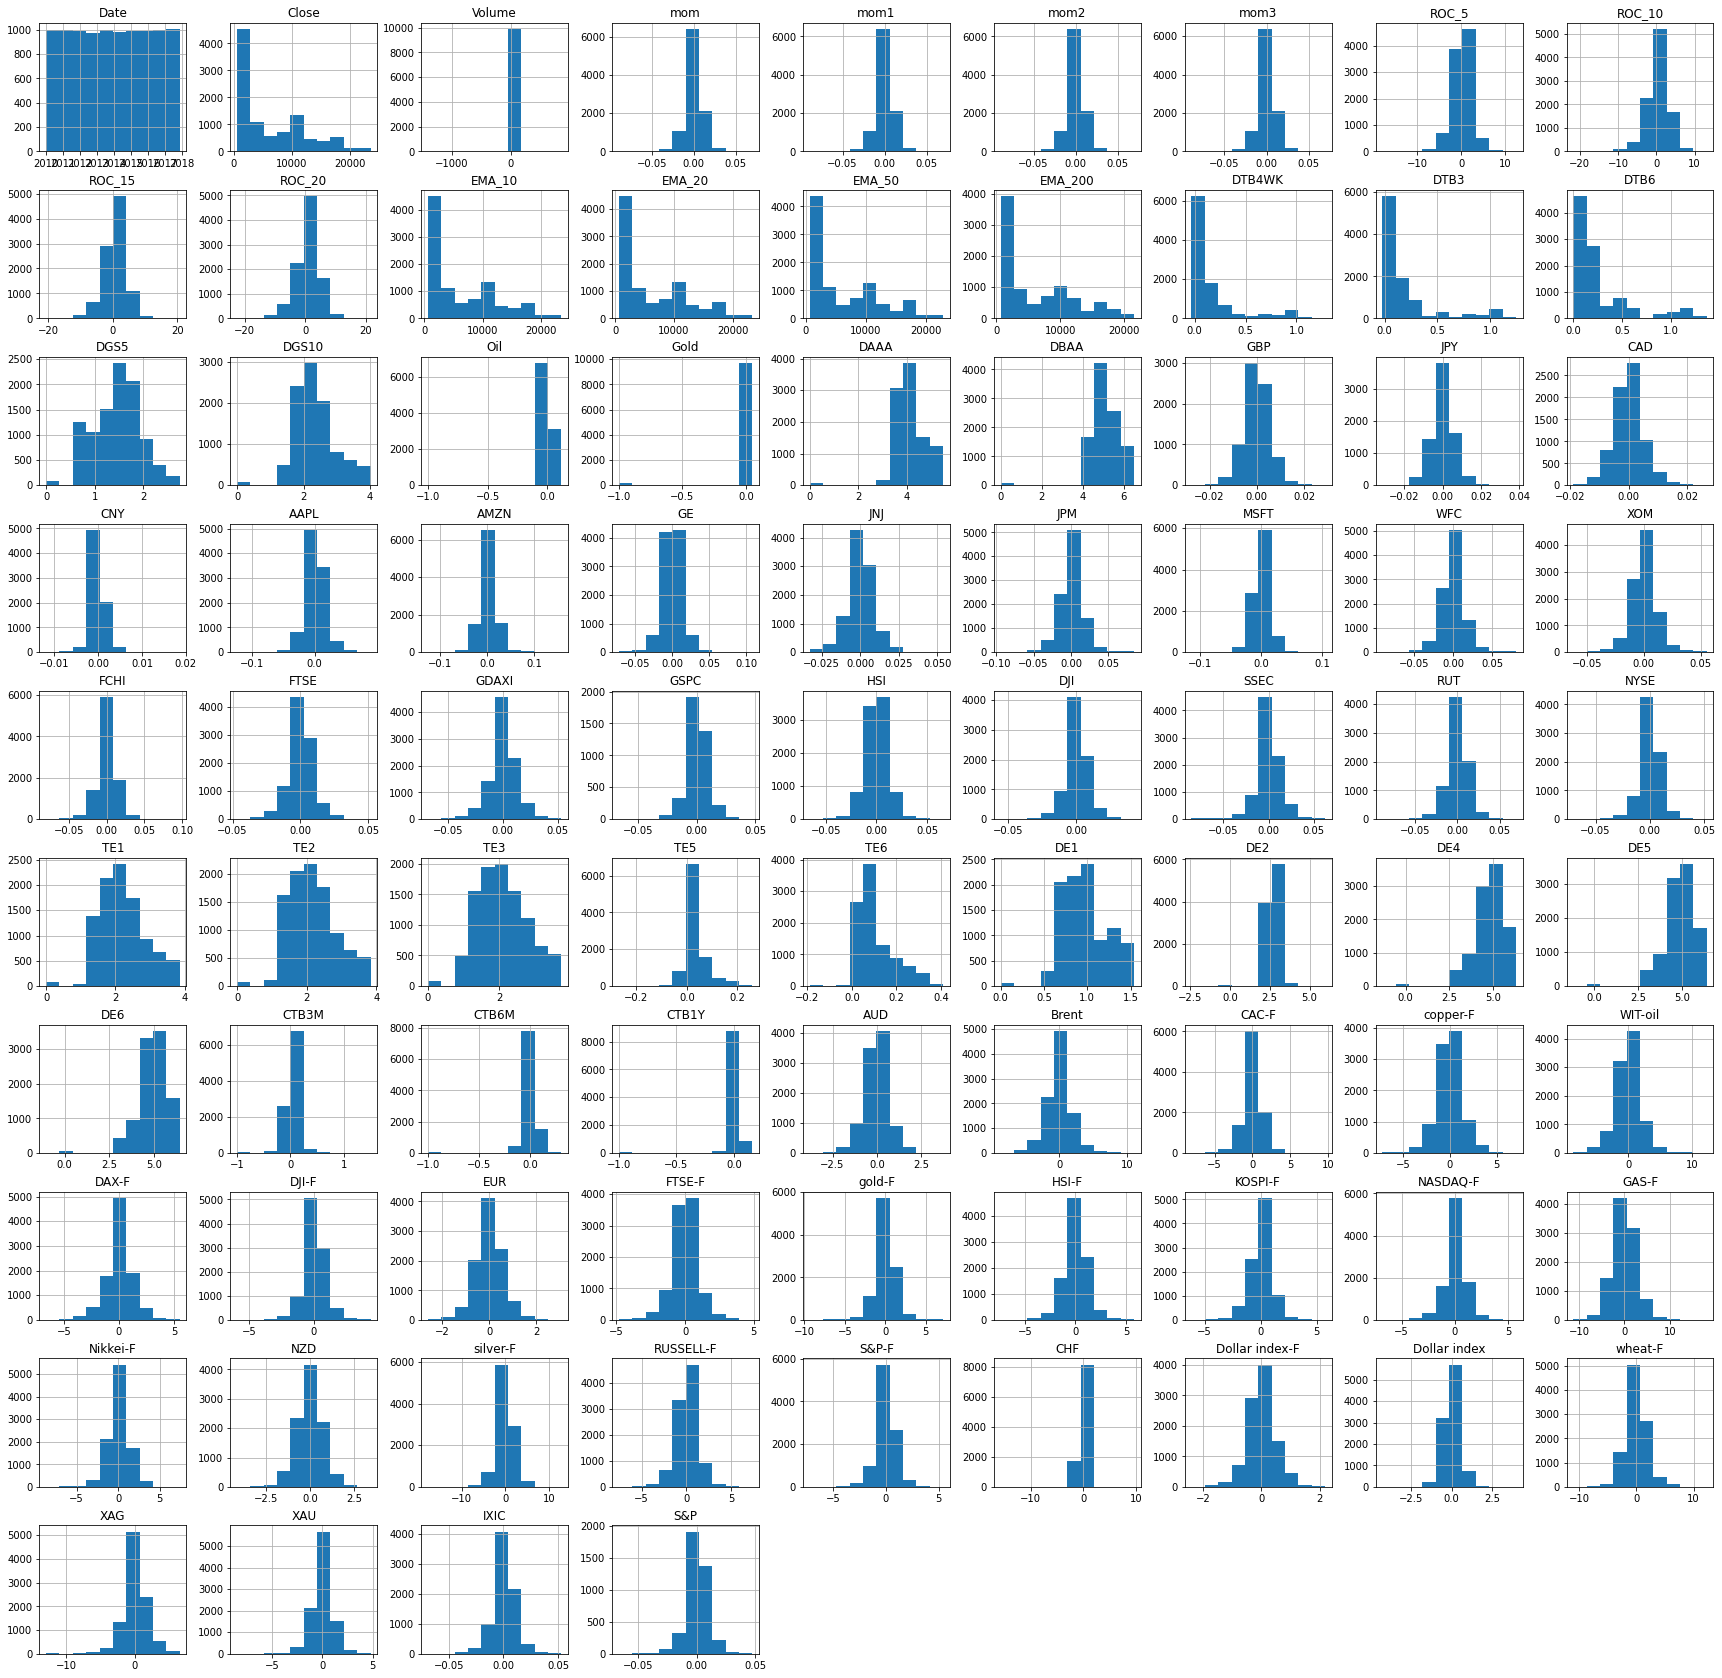

In [20]:
import matplotlib.pyplot as plt
whole_data.hist(figsize=(30,30))
plt.show()

In [21]:
def cnn_data_sequence(data, target, seque_len):
    print ('sequencing data ...')
    new_train = []
    new_target = []

    for index in range(data.shape[1] - seque_len + 1):
        new_train.append(data[:, index: index + seque_len])
        new_target.append(target[index + seque_len - 1])

    new_train = np.array(new_train)
    new_target = np.array(new_target)

    return new_train, new_target

In [22]:
# Remember: we defined our indexes as our dates.
print(dataset_NASDAQ.Close[0])
print("--------")
dataset_NASDAQ.Close[0:5]

2269.149902
--------


Date
2009-12-31    2269.149902
2010-01-04    2308.419922
2010-01-05    2308.709961
2010-01-06    2301.090088
2010-01-07    2300.050049
Name: Close, dtype: float64

In [23]:
# (data['Close'][predict_day:] / data['Close'][:-predict_day].values).astype(int)
(dataset_NASDAQ['Close'][1:] / dataset_NASDAQ['Close'][:-1].values).astype(int) # -> Bu kısma bir daha bak

Date
2010-01-04    1
2010-01-05    1
2010-01-06    0
2010-01-07    0
2010-01-08    1
             ..
2017-11-09    0
2017-11-10    1
2017-11-13    1
2017-11-14    0
2017-11-15    0
Name: Close, Length: 1983, dtype: int64

In [24]:
predict_index = "RUT"  #  -> Change this part to see the results. # RUT, S&P, NYA, NASDAQ, DJI
number_of_stocks = 0
order_stocks = []
predict_day = 1


def prepare_for_CNN():
    global number_of_stocks
    global samples_in_each_stock
    global number_feature
    #global predict_index
    global order_stocksw
    tottal_train_data = np.empty((0,82))  # column number is 82
    tottal_train_target = np.empty((0))
    tottal_test_data = np.empty((0,82))
    tottal_test_target = np.empty((0))
    
    for data in [dataset_DJI, dataset_NASDAQ, dataset_NYSE, dataset_RUSSELL, dataset_SP]:
        
        number_of_stocks += 1
        
        df_name = data['Name'][0]
        order_stocks.append(df_name)
        del data['Name']                # deletes "Name" column

        target = (data['Close'][predict_day:] / data['Close'][:-predict_day].values).astype(int)
        print(target)   # (0's or 1's.)
        print("*****")
        data = data[:-predict_day]
        target.index = data.index
        # Becasue of using 200 days Moving Average as one of the features
        data = data[200:]                         # Bu kısma bir daha bak
        data = data.fillna(0)
        data['target'] = target
        target = data['target']
        del data['target']
        del data['Date']
        # data['Date'] = data['Date'].apply(lambda x: x.weekday())

        number_feature = data.shape[1]
        samples_in_each_stock = data.shape[0]

        train_data = data[data.index < '2016-04-21']
        train_data = scale(train_data)
        
        print("train data:", train_data)
        
        if df_name == predict_index:
            tottal_train_target = target[target.index < '2016-04-21']
            tottal_test_target = target[target.index >= '2016-04-21']

        data = pd.DataFrame(scale(data.values), columns=data.columns)
        data.index = target.index
        test_data = data[data.index >= '2016-04-21']

        tottal_train_data = np.concatenate((tottal_train_data, train_data))
        print(tottal_train_data.shape)
        tottal_test_data = np.concatenate((tottal_test_data, test_data))
        print(tottal_test_data.shape)
        
    print("order_stocks:", order_stocks)
        
    train_size = int(tottal_train_data.shape[0]/number_of_stocks)
    print("Train size:", train_size)
    test_size = int(tottal_test_data.shape[0] / number_of_stocks)
    print("Test size:", test_size)
    
    tottal_train_data = tottal_train_data.reshape(number_of_stocks, train_size, number_feature)
    print("Total train data shape:", tottal_train_data.shape)
    tottal_test_data = tottal_test_data.reshape(number_of_stocks, test_size, number_feature) 
    print("Total test data shape:", tottal_test_data.shape)
    
    print("tottal_train_target:", tottal_train_target, "shape :", tottal_train_target.shape)
    print("tottal_test_target: ", tottal_test_target, "shape:", tottal_test_target.shape)

    return tottal_train_data, tottal_test_data, tottal_train_target, tottal_test_target

In [25]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision_pos = precision(y_true, y_pred)
    recall_pos = recall(y_true, y_pred)
    precision_neg = precision((K.ones_like(y_true)-y_true), (K.ones_like(y_pred)-K.clip(y_pred, 0, 1)))
    recall_neg = recall((K.ones_like(y_true)-y_true), (K.ones_like(y_pred)-K.clip(y_pred, 0, 1)))
    f_posit = 2*((precision_pos*recall_pos)/(precision_pos+recall_pos+K.epsilon()))
    f_neg = 2 * ((precision_neg * recall_neg) / (precision_neg + recall_neg + K.epsilon()))

    return (f_posit + f_neg) / 2

def sklearn_acc(model, test_data, test_target):
    overall_results = model.predict(test_data)
    test_pred = (overall_results > 0.5).astype(int)
    acc_results = [mae(overall_results, test_target), accuracy(test_pred, test_target),
                   f1_score(test_pred, test_target, average='macro')]

    return acc_results

In [26]:
number_filter = [8,8,8]

def CNN(train_data, test_data, train_target, test_target):
    # hisory of data in each sample
    seq_len = 60
    epoc = 100
    drop = 0.1
    
    cnn_train_data, cnn_train_target = cnn_data_sequence(train_data, train_target, seq_len)
    #print("cnn_train_data:", cnn_train_data.shape)
    #print("cnn_train_target:", cnn_train_target.shape)
    
    cnn_test_data, cnn_test_target = cnn_data_sequence(test_data, test_target, seq_len)
    #print("cnn_test_data:", cnn_test_data.shape)
    #print("cnn_test_target:", cnn_test_target.shape)
    
    result = []
    
    for i in range(1,5):   
        K.clear_session()
        print ('i: ', i)
        
        print('fitting model')
        
        model = Sequential()
                                            # M0 -> inputs are given (60,5,82)
        #layer 1                            # M1 -> (60,5,8) (# past days, # markets, # features)
        model.add(Conv2D(number_filter[0], (1, 1), activation='relu', input_shape=(number_of_stocks,seq_len, number_feature), data_format='channels_last'))
        model.add(Dropout(0.1)) # added     # +++ Dropout 
        
        #layer 2
        model.add(BatchNormalization())     # added   +++ Batch Normalization
        model.add(Conv2D(number_filter[1], (number_of_stocks, 3), activation='relu'))
        model.add(MaxPool2D(pool_size=(1, 2)))
        model.add(Dropout(0.2)) # added

        
        #layer 3
        model.add(Conv2D(number_filter[2], (1, 3), activation='relu'))
        model.add(MaxPool2D(pool_size=(1, 2)))
        
        # Flattening Layer:
        model.add(Flatten())
        model.add(Dropout(0.01))  # added
        
        # Last Layer:
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer='Adam', loss='mae', metrics=['acc',f1])

        #best_model = callbacks.ModelCheckpoint(filepath, monitor='val_f1', verbose=0, save_best_only=True,
                                               #save_weights_only=False, mode='max', period=1)

        model.fit(cnn_train_data, cnn_train_target, epochs=epoc, batch_size=128, verbose=0, validation_split=0.25) #callbacks=[best_model],

    #   model = load_model(filepath, custom_objects={'f1': f1})
        test_pred = sklearn_acc(model,cnn_test_data, cnn_test_target)
        print (test_pred)
        result.append(test_pred)
                
        model.summary() # added 
        
        plot_model(model)    
    
    print('saving results')
    results = pd.DataFrame(result , columns=['MAE', 'Accuracy', 'F-score'])
    results = results.append([results.mean(), results.max(), results.std()], ignore_index=True)
    #results.to_csv(join(Base_dir, '3D-models/{}/new results.csv'.format(predict_index)), index=False)
    return results
    

In [27]:
train_data, test_data, train_target, test_target = prepare_for_CNN()

CNN(train_data, test_data, train_target, test_target)

Date
2010-01-04    1
2010-01-05    0
2010-01-06    1
2010-01-07    1
2010-01-08    1
             ..
2017-11-09    0
2017-11-10    0
2017-11-13    1
2017-11-14    0
2017-11-15    0
Name: Close, Length: 1983, dtype: int64
*****
train data: [[-1.61843812e+00 -4.97237962e-03  7.60884177e-01 ... -1.06898516e+00
   1.33049302e-01  4.94814172e-02]
 [-1.69081489e+00  9.42328192e-03 -1.67301913e+00 ... -1.34989491e+00
  -2.09378625e+00 -2.28768559e+00]
 [-1.63410023e+00  4.30775948e-03  1.25238419e+00 ...  1.35319892e+00
   1.24393082e+00  7.52457430e-01]
 ...
 [ 1.38960481e+00 -5.20925771e-03  6.12162257e-01 ...  1.42740149e+00
  -2.41987672e-02 -1.78757548e-01]
 [ 1.41128205e+00  1.53736665e-03  2.58439544e-01 ...  1.47510315e+00
   2.22292686e+00  1.40978565e+00]
 [ 1.42999111e+00 -4.25107220e-01  2.16366265e-01 ...  1.92561879e+00
   6.71065631e-02 -4.70903424e-01]]
(1386, 82)
(397, 82)
Date
2010-01-04    1
2010-01-05    1
2010-01-06    0
2010-01-07    0
2010-01-08    1
             ..
201


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

[0.4544860961345526, 0.5443786982248521, 0.3583333333333333]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 60, 8)          664       
_________________________________________________________________
dropout (Dropout)            (None, 5, 60, 8)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 60, 8)          32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 58, 8)          968       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 29, 8)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 29, 8)          0         
_____________________________________________________________

,MAE,Accuracy,F-score
0,0.454486,0.544379,0.358333
1,0.454940,0.538462,0.396346
2,0.458667,0.538462,0.405171
3,0.443621,0.556213,0.461097
4,0.452928,0.544379,0.405237
5,0.458667,0.556213,0.461097
6,0.006482,0.008368,0.042424


In [28]:
def cnn_data_sequence_for_intermediate(data, target, seque_len):
    print ('sequencing data ...')
    new_train = []
    new_target = []

    for index in range(data.shape[1] - seque_len + 1):
        new_train.append(data[:, index: index + seque_len])
        new_target.append(target[index + seque_len - 1])

    new_train = np.array(new_train)
    new_target = np.array(new_target)

    return new_train, new_target

In [29]:
from tensorflow.python.keras import Model

def intermediate_CNN(train_data, test_data, train_target, test_target):
    # hisory of data in each sample
    seq_len = 60
    epoc = 100
    drop = 0.1
    
    cnn_train_data, cnn_train_target = cnn_data_sequence(train_data, train_target, seq_len)
    print("cnn_train_data:", cnn_train_data.shape)
    print("cnn_train_target:", cnn_train_target.shape)
    
    cnn_test_data, cnn_test_target = cnn_data_sequence(test_data, test_target, seq_len)
    print("cnn_test_data:", cnn_test_data.shape)
    print("cnn_test_target:", cnn_test_target.shape)
    
    result = []
    
           
    print('fitting model')
    
    model = Sequential()
                                        # M0 -> inputs are given (60,5,82)
    #layer 1                            # M1 -> (60,5,8) (# past days, # markets, # features)
    model.add(Conv2D(number_filter[0], (1, 1), activation='relu', input_shape=(number_of_stocks,seq_len, number_feature), data_format='channels_last'))
    model.add(Dropout(0.1)) # added     # +++ Dropout 
    
    #layer 2
    model.add(BatchNormalization())     # added   +++ Batch Normalization
    model.add(Conv2D(number_filter[1], (number_of_stocks, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(1, 2)))
    model.add(Dropout(0.2)) # added

    
    #layer 3
    model.add(Conv2D(number_filter[2], (1, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(1, 2)))
    
    # Flattening Layer:
    model.add(Flatten())
    outputlayer = Dropout(0.01)
    model.add(outputlayer)  # added
        
    return model,outputlayer

In [30]:
new_train, new_target = cnn_data_sequence_for_intermediate(train_data, train_target, 60)
model, outputlayer = intermediate_CNN(train_data, test_data, train_target, test_target)
intermediate_model = Model(model.input, outputlayer.output)
cnn_features = intermediate_model.predict(new_train)

sequencing data ...
sequencing data ...
cnn_train_data: (1327, 5, 60, 82)
cnn_train_target: (1327,)
sequencing data ...
cnn_test_data: (338, 5, 60, 82)
cnn_test_target: (338,)
fitting model


In [31]:
new_test, new_target_test = cnn_data_sequence_for_intermediate(test_data, test_target, 60)
test_cnn_features = intermediate_model.predict(new_test)

sequencing data ...


# XGBoost

In [32]:
from xgboost import XGBClassifier

In [33]:
xgbmodel = XGBClassifier()

In [34]:
xgbmodel.fit(cnn_features, new_target)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
pred = xgbmodel.predict(test_cnn_features)

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(new_target_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.5059171597633136


In [37]:
print("f1 score:", f1_score(new_target_test, pred, average="macro"))

f1 score: 0.49992469545957924


In [38]:
print("MAE:", mae(new_target_test, pred))

MAE: 0.4940828402366864


# S&P 500 Results:

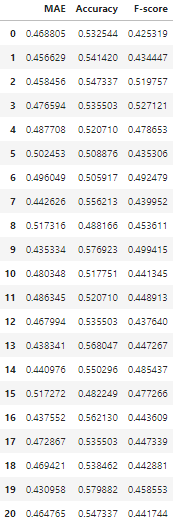

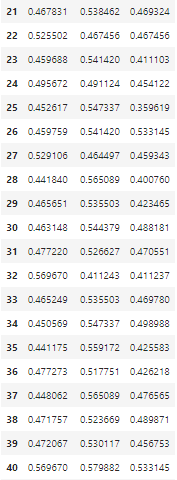

In [39]:
best_SP_results = []
SP_CNN_XGBoost = [0.5532544378698225, 0.5518382901750042, 0.4467455621301775] # Accuracy, F1, MAE

# DJI Results:

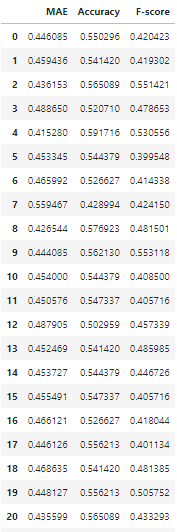

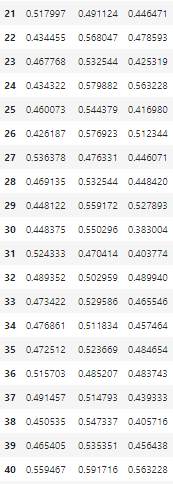

In [40]:
best_DJI_results = []
DJI_CNN_XGBoost = [0.4970414201183432, 0.48484848484848486, 0.5029585798816568]

# NASDAQ Results:

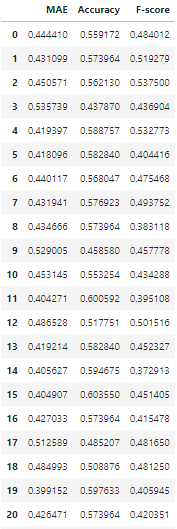

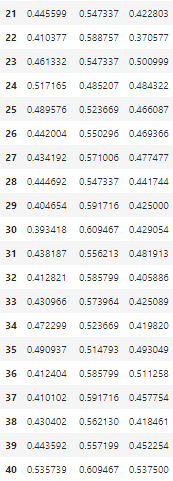

In [41]:
best_NASDAQ_results = []
NASDAQ_CNN_XGBoost = [0.5355029585798816, 0.5219063921798279, 0.46449704142011833]

# NYSE Results:

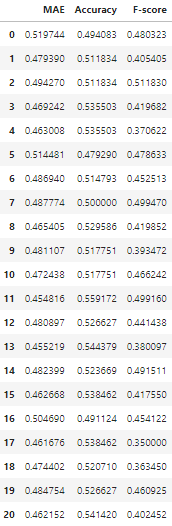

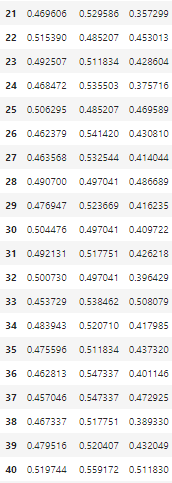

In [42]:
best_NYSE_results = []
NYSE_CNN_XGBoost = [0.5325443786982249, 0.45984545049965614, 0.46745562130177515]

# RUSSELL Results:

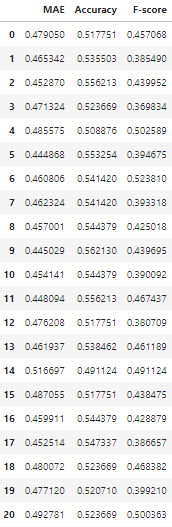

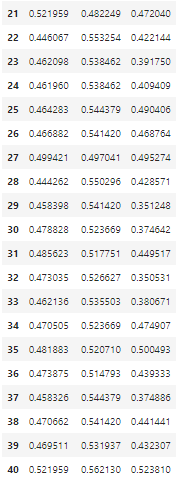

In [43]:
best_RUSSELL_results = []
RUSSELL_CNN_XGBoost = [0.5266272189349113, 0.5255640944660842, 0.47337278106508873]

In [44]:
# Tablo yapılacak